# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание 10 баллов

## Часть 1. Обучение моделей классификации (5 баллов).

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn). Каждый пункт задания весит 1 балл, если вы не ответили на какой-то вопрос, снимается 1/10 балла.

A . Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Вышка/МО/ДЗ3 МО/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**A)**


In [5]:
df.isnull().sum()
#пропусков нет

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [6]:
#разбили переменные на категориальные и числовые
var_cat = ['State', 'Area code', 'International plan', 'Voice mail plan']

var_real = [
    'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes',
    'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls',
    'Total intl charge', 'Customer service calls', 'Account length'
]

target = 'Churn'

df_cont = df.drop(['State', 'Area code', 'International plan', 'Voice mail plan'], axis = 1)

In [7]:
#сделаем OHE кодирование для категориальных признаков

df = pd.get_dummies(df, columns = var_cat, drop_first=True) * 1

df['Churn'] = df['Churn'] * 1

In [8]:
df.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

# опция stratify делает разбиение на тест и трэйн сбалансированным по Churn
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Churn'])

y_train = df_train['Churn']
y_test = df_test['Churn']
X_train = df_train.drop('Churn', axis=1)
X_test = df_test.drop('Churn', axis=1)

In [10]:
#Отнормировали данные
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train[var_real])
X_test_scaled = scaler_x.transform(X_test[var_real])


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.arange(0, 1.1, 0.1)}

logit = LogisticRegression()


searcher = GridSearchCV(logit, param_grid, cv = 10)

searcher.fit(X_train_scaled, y_train)

print('best score:', searcher.best_score_)
print("Лучшие параметры: ", searcher.best_params_)



best score: 0.8582059080284982
Лучшие параметры:  {'C': 0.2}


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


y_pred_test = searcher.predict(X_test_scaled)
y_pred_train = searcher.predict(X_train_scaled)

print(f"{accuracy_score(y_test, y_pred_test)} Accuracy score на тесте")
print(f"{roc_auc_score(y_test, y_pred_test)} roc-auc на тесте")
print(f"{f1_score(y_test, y_pred_test)} f1 score на тесте", sep ="\n")

print(f"{accuracy_score(y_train, y_pred_train)} Accuracy score на трейне")
print(f"{roc_auc_score(y_train, y_pred_train)} roc-auc на трейне")
print(f"{f1_score(y_train, y_pred_train)} f1 score на трейне")

0.8530734632683659 Accuracy score на тесте
0.5376198227527582 roc-auc на тесте
0.15517241379310345 f1 score на тесте
0.8582145536384096 Accuracy score на трейне
0.5404917734751385 roc-auc на трейне
0.16 f1 score на трейне


Высокая точность при низких значениях ROC-AUC и F1 Score может указывать на то, что модель хорошо работает на одном классе (например, на классе большинства), но плохо справляется с предсказанием другого класса (класса меньшинства).


**B (SVM)**

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

param_grid = {'C': np.arange(0, 1.1, 0.1)}

clf = GridSearchCV(svc, param_grid, cv = 10)
clf.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [14]:
print("Лучшие параметры: ", clf.best_params_)

Лучшие параметры:  {'C': 0.1}


In [15]:
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

In [16]:
print(f"{accuracy_score(y_test, y_pred_test)} Accuracy score на тесте")
print(f"{roc_auc_score(y_test, y_pred_test)} roc-auc на тесте")
print(f"{f1_score(y_test, y_pred_test)} f1 score на тесте")

print(f"{accuracy_score(y_train, y_pred_train)} Accuracy score на трейне")
print(f"{roc_auc_score(y_train, y_pred_train)} roc-auc на трейне")
print(f"{f1_score(y_train, y_pred_train)} f1 score на трейне")

0.8545727136431784 Accuracy score на тесте
0.5 roc-auc на тесте
0.0 f1 score на тесте
0.8552138034508627 Accuracy score на трейне
0.5 roc-auc на трейне
0.0 f1 score на трейне


accuracy score (около 0.85) может быть обманчив, т.к. это может говорить о том, что модель просто предсказывает наиболее часто встречающийся класс и игнорирует остальные.

ROC-AUC значение в 0.5 указывает, что модель не лучше случайного угадывания. Это явный признак того, что модель не научилась различать классы.

F1 score равный 0.0 означает, что модель не предсказывает положительный класс вообще. Это особенно плохо, так как модель просто игнорирует один из классов, что недопустимо для хорошей классификации.


Судя по результатам, модель недообучена, поскольку она не способна различать классы и фактически делает тривиальные предсказания (например, всегда предсказывает только один класс).

**C) Добавление полиномиальных признаков + регуляризация**

In [17]:
from sklearn.preprocessing import PolynomialFeatures

y = df['Churn']

X = df.drop('Churn', axis=1)


poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test = train_test_split(X_poly_scaled, test_size=0.25)
y_train, y_test = train_test_split(y, test_size=0.25)

model = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
              'C': np.logspace(0, 1.1, 20)}

searcher = GridSearchCV(model, param_grid, cv = 5)

searcher.fit(X_train, y_train)

print("Лучшие параметры: ", searcher.best_params_)

Лучшие параметры:  {'C': 1.0, 'penalty': 'l2'}


In [18]:
y_pred_test = searcher.predict(X_test)
y_pred_train = searcher.predict(X_train)

print(f"{accuracy_score(y_test, y_pred_test)} Accuracy score на тесте")
print(f"{roc_auc_score(y_test, y_pred_test)} roc-auc на тесте")
print(f"{f1_score(y_test, y_pred_test)} f1 score на тесте", sep ="\n")

print(f"{accuracy_score(y_train, y_pred_train)} Accuracy score на трейне")
print(f"{roc_auc_score(y_train, y_pred_train)} roc-auc на трейне")
print(f"{f1_score(y_train, y_pred_train)} f1 score на трейне")

0.7733812949640287 Accuracy score на тесте
0.527442071785552 roc-auc на тесте
0.1888412017167382 f1 score на тесте
0.9387755102040817 Accuracy score на трейне
0.8158858980032802 roc-auc на трейне
0.751219512195122 f1 score на трейне


Получили явное переобучение, далее попробуем использовать третью степень полиномов.


In [19]:
y = df['Churn']

X = df.drop('Churn', axis=1)


poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test = train_test_split(X_poly_scaled, test_size=0.25)
y_train, y_test = train_test_split(y, test_size=0.25)

model = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f"{accuracy_score(y_test, y_pred_test)} Accuracy score на тесте")
print(f"{roc_auc_score(y_test, y_pred_test)} roc-auc на тесте")
print(f"{f1_score(y_test, y_pred_test)} f1 score на тесте", sep ="\n")

print(f"{accuracy_score(y_train, y_pred_train)} Accuracy score на трейне")
print(f"{roc_auc_score(y_train, y_pred_train)} roc-auc на трейне")
print(f"{f1_score(y_train, y_pred_train)} f1 score на трейне")

0.7685851318944844 Accuracy score на тесте
0.49800090867787367 roc-auc на тесте
0.12669683257918551 f1 score на тесте
0.9943977591036415 Accuracy score на трейне
0.9828196183583683 roc-auc на трейне
0.980225988700565 f1 score на трейне


**D)**

<Axes: >

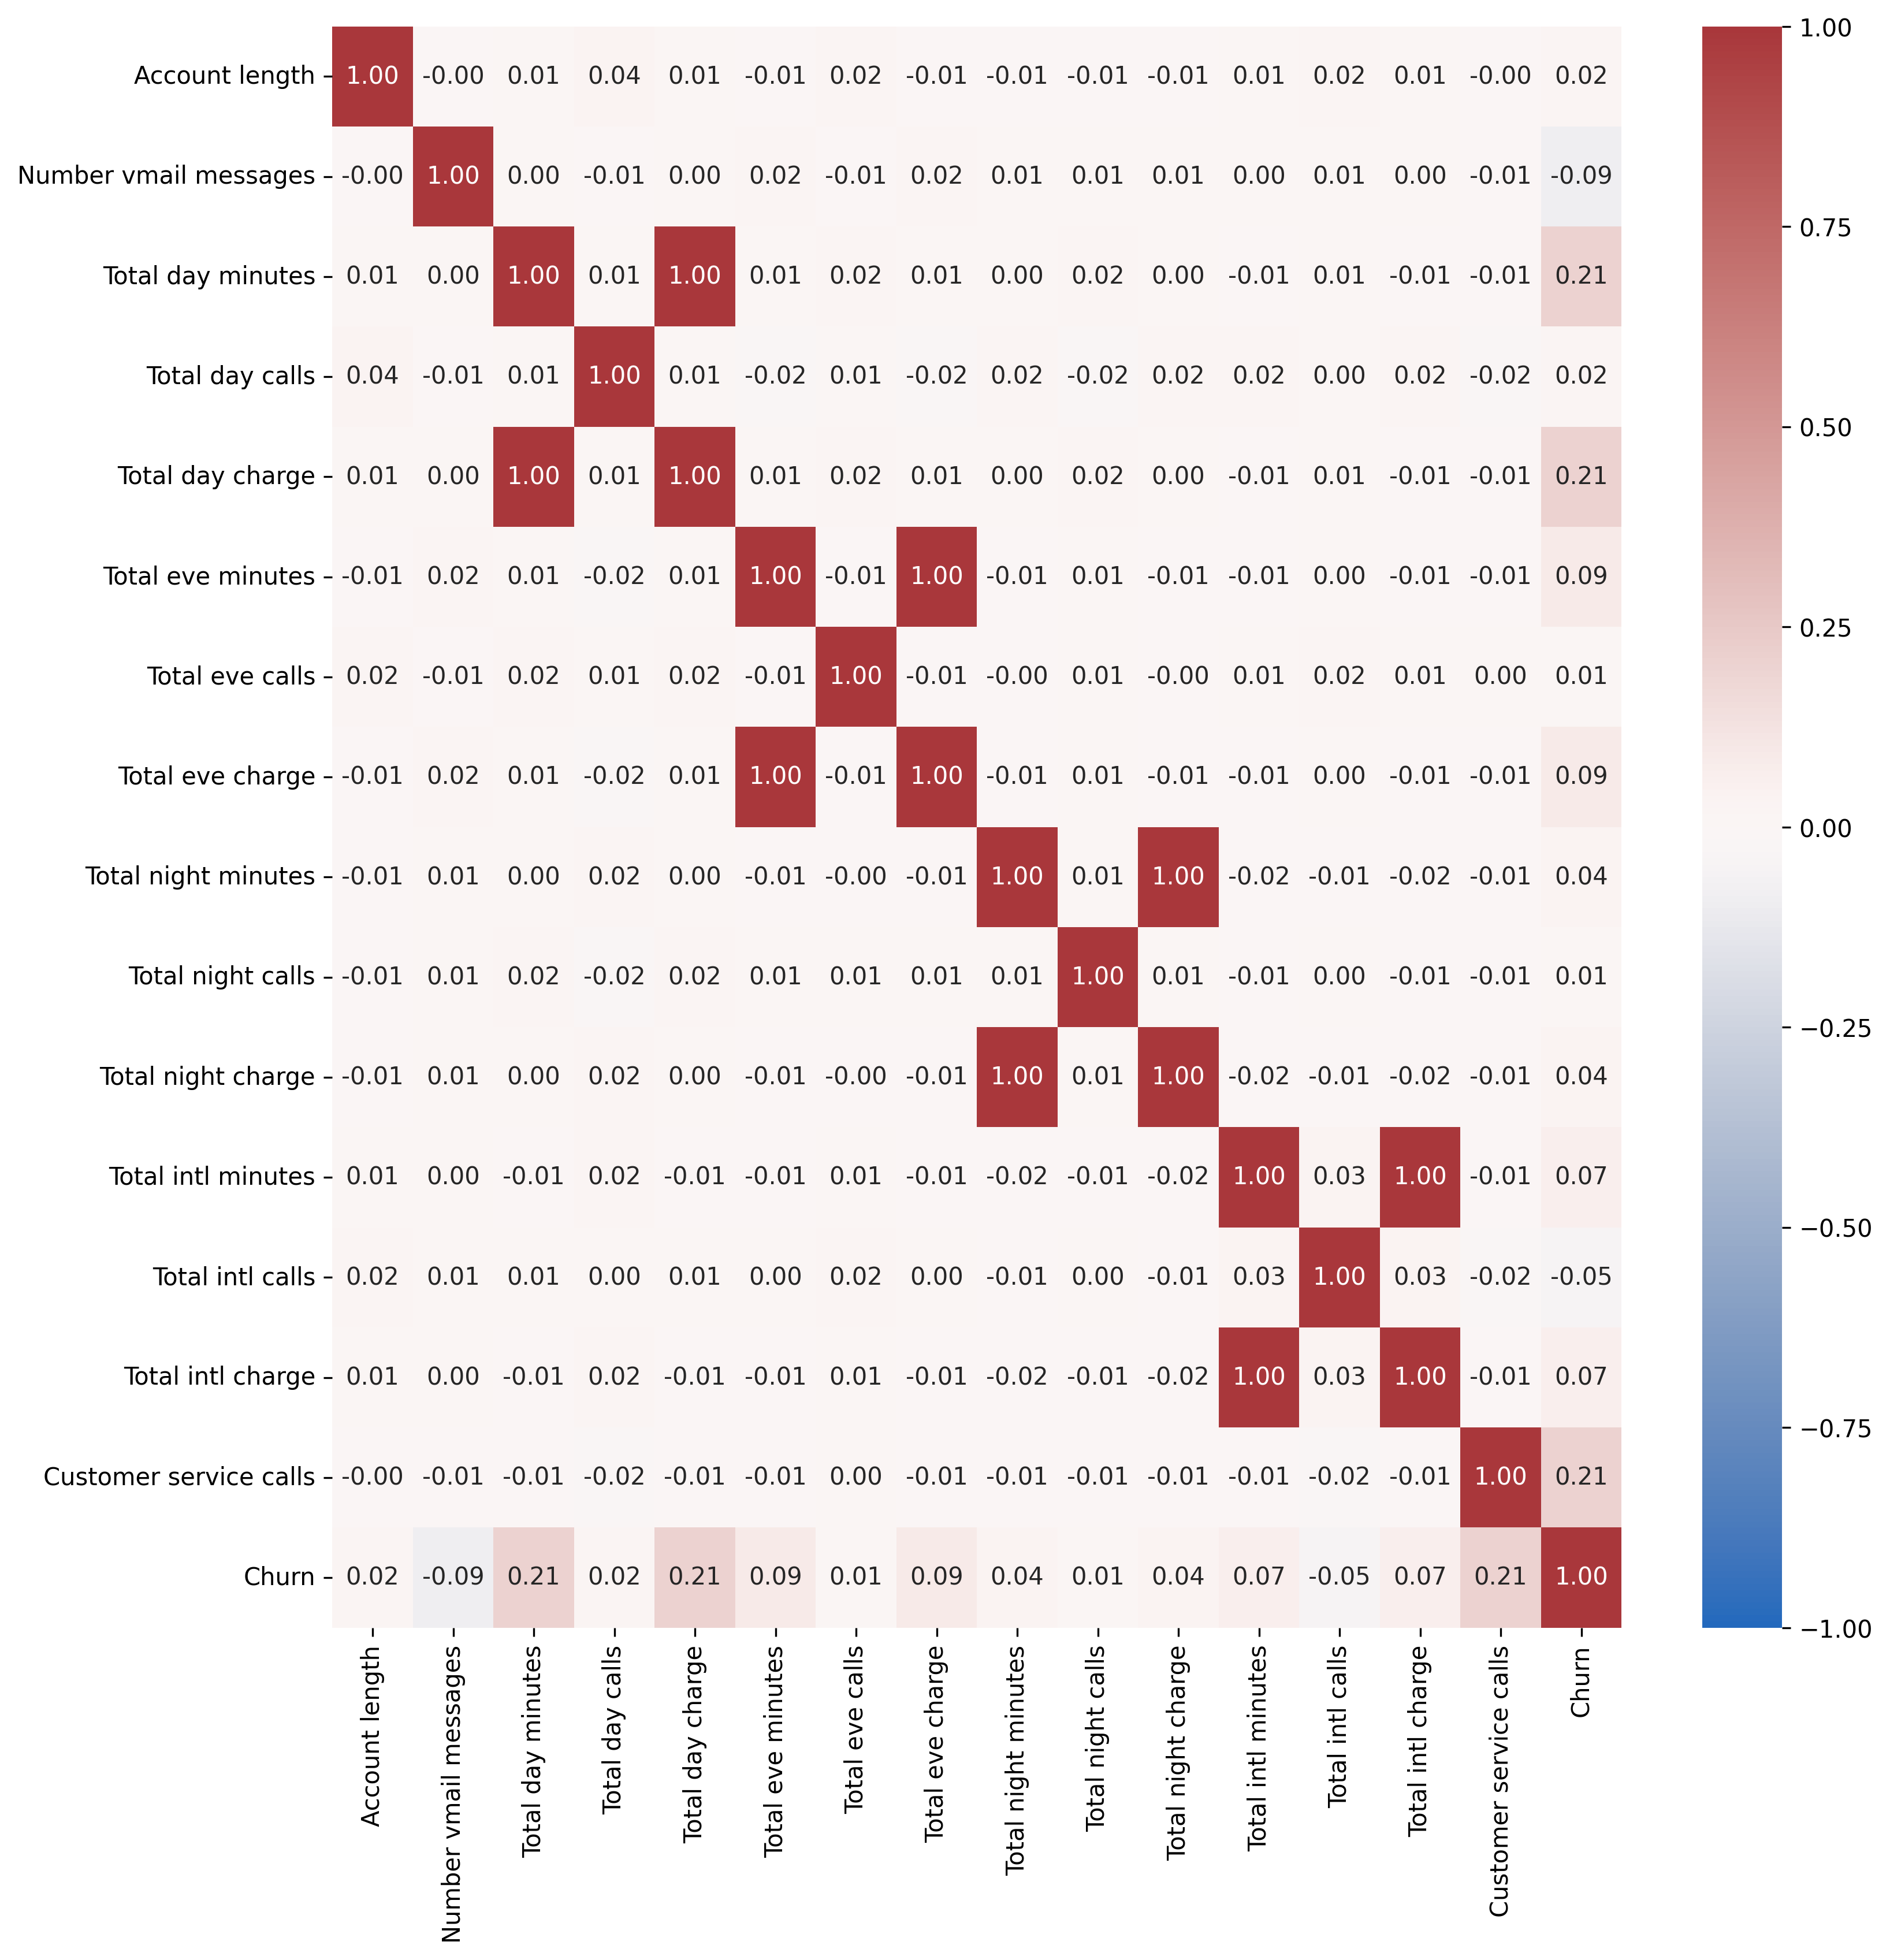

In [22]:
import seaborn as sns
plt.figure(figsize=(12, 12), dpi=300)
sns.heatmap(df_cont.corr(), cmap="vlag", annot=True, fmt="0.2f", vmin = -1)

Получили явное переобучение...

**Итог:** Лучшей моделью получилась обычная логистическая регрессия, к сожалению она предсказывает на уровне случайного классификатора, что делает ее не очень хорошей.
Остальные модели получились явно переобучеными даже с регуляризацией.

## Часть 2. Оценка качества моделей классификации (5 баллов).

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные).
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [23]:
df = pd.read_csv("/content/drive/MyDrive/Вышка/МО/ДЗ3 МО/credit_scoring_example.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


**Задание 1. (0.25  баллов)** Проверьте target на сбалансированность по классам, сделайте вывод.

In [24]:
df.target.value_counts()

,count
target,
0,382
1,307


**Задание 2. (0.25  баллов)** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [25]:
print(f'Алгоритм 1: {accuracy_score(df.target, df.pred1_classes)}')
print(f'Алгоритм 2: {accuracy_score(df.target, df.pred2_classes)}') #best
print(f'Алгоритм 3: {accuracy_score(df.target, df.pred3_classes)}')

Алгоритм 1: 0.6618287373004355
Алгоритм 2: 0.6719883889695211
Алгоритм 3: 0.6400580551523948


**Задание 3. (0.25  баллов)** Теперь вычислите точность и полноту каждого из алгоритмов.

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'Precision (точность) для алгоритма 1: {precision_score(df.target, df.pred1_classes)}')
print(f'Precision (точность) для алгоритма 2: {precision_score(df.target, df.pred2_classes)}')
print(f'Precision (точность) для алгоритма 3: {precision_score(df.target, df.pred3_classes)}\n')

print(f'Recall (полнота) для алгоритма 1: {recall_score(df.target, df.pred1_classes)}')
print(f'Recall (полнота) для алгоритма 2: {recall_score(df.target, df.pred2_classes)}')
print(f'Recall (полнота) для алгоритма 3: {recall_score(df.target, df.pred3_classes)}')

Precision (точность) для алгоритма 1: 0.6907216494845361
Precision (точность) для алгоритма 2: 0.6103542234332425
Precision (точность) для алгоритма 3: 0.6903225806451613

Recall (полнота) для алгоритма 1: 0.4364820846905538
Recall (полнота) для алгоритма 2: 0.7296416938110749
Recall (полнота) для алгоритма 3: 0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4. (0.25  баллов)** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [27]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
cm1 = confusion_matrix(df.target, df.pred1_classes)
cm2 = confusion_matrix(df.target, df.pred2_classes)
cm3 = confusion_matrix(df.target, df.pred3_classes)

classes = df.target.unique()

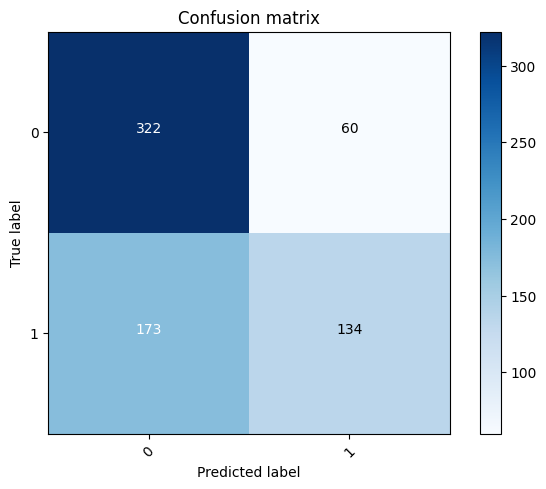

In [29]:
plot_confusion_matrix(cm1, classes)

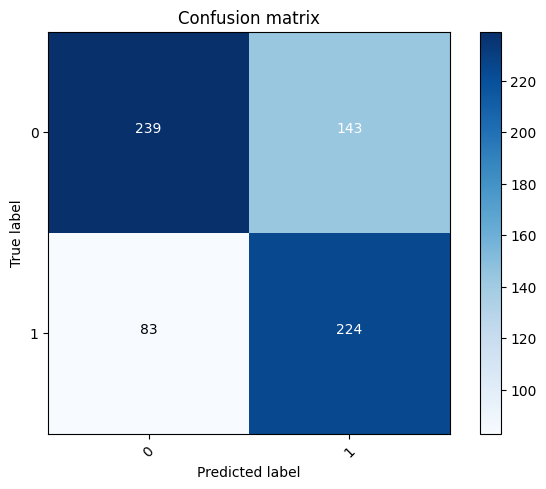

In [30]:
plot_confusion_matrix(cm2, classes)

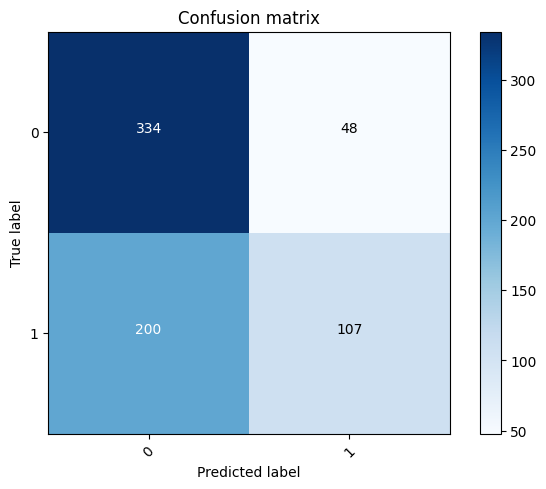

In [31]:
plot_confusion_matrix(cm3, classes)

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5. (1  балл)** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [32]:
def var1(target, proba):
    best_recall = 0
    best_i = 0
    for i in np.arange(0, 1.01, 0.01):
        pred = (proba >= i) * 1
        if (accuracy_score(target, pred) >= 0.65) & (recall_score(target, pred) > best_recall):
            best_recall = recall_score(target, pred)
            best_i = i
    return(best_i)

In [33]:
alg_1 = var1(df.target, df.pred1_probs)
alg_2 = var1(df.target, df.pred2_probs)
alg_3 = var1(df.target, df.pred3_probs)

print(f'Порог принятия решения для алгоритма 1: {alg_1}')
print(f'Порог принятия решения для алгоритма 2: {alg_2}')
print(f'Порог принятия решения для алгоритма 3: {alg_3}')

Порог принятия решения для алгоритма 1: 0.36
Порог принятия решения для алгоритма 2: 0.27
Порог принятия решения для алгоритма 3: 0


**Задание 6. (0.25  баллов)** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

In [34]:
pred_1 = (df.pred1_probs >= alg_1) * 1
pred_2 = (df.pred2_probs >= alg_2) * 1

cm1 = confusion_matrix(df.target, pred_1)
cm2 = confusion_matrix(df.target, pred_2)

0.6516690856313497


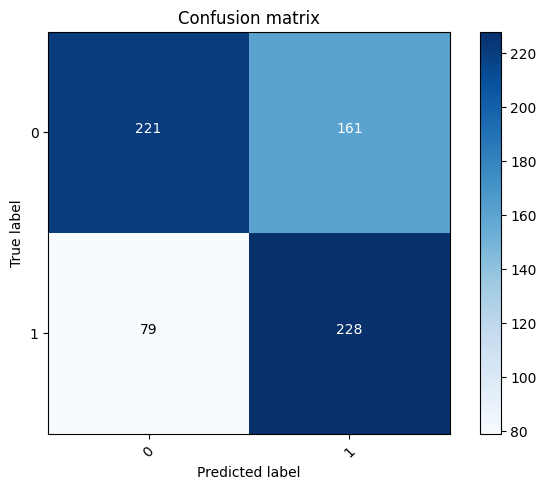

In [35]:
plot_confusion_matrix(cm1, classes)
print(accuracy_score(df.target, pred_1))

0.6748911465892597


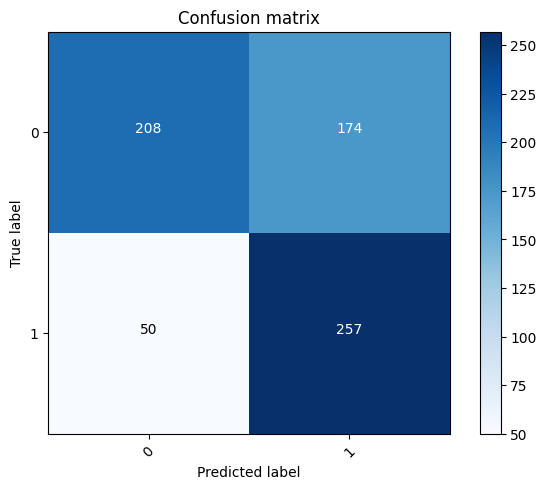

In [36]:
plot_confusion_matrix(cm2, classes)
print(accuracy_score(df.target, pred_2))

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Вторая модель справилась лучше

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги).
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7. (0.75  баллов)** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

In [37]:
from sklearn.metrics import precision_score

def var2(target, proba):
    best_precision = 0
    best_i = 0
    for i in np.arange(0, 1.01, 0.01):
        pred = (proba >= i) * 1
        if (accuracy_score(target, pred) >= 0.65) & (precision_score(target, pred) > best_precision):
            best_precision = precision_score(target, pred)
            best_i = i
    return(best_i)

In [38]:
alg_1 = var2(df.target, df.pred1_probs)
alg_2 = var2(df.target, df.pred2_probs)

print(f'Порог принятия решения для алгоритма 1: {alg_1}')
print(f'Порог принятия решения для алгоритма 2: {alg_2}')

Порог принятия решения для алгоритма 1: 0.54
Порог принятия решения для алгоритма 2: 0.73


**Задание 8. (0.5  баллов)** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

In [39]:
pred_1 = (df.pred1_probs >= alg_1) * 1
pred_2 = (df.pred2_probs >= alg_2) * 1

cm1 = confusion_matrix(df.target, pred_1)
cm2 = confusion_matrix(df.target, pred_2)

0.6618287373004355


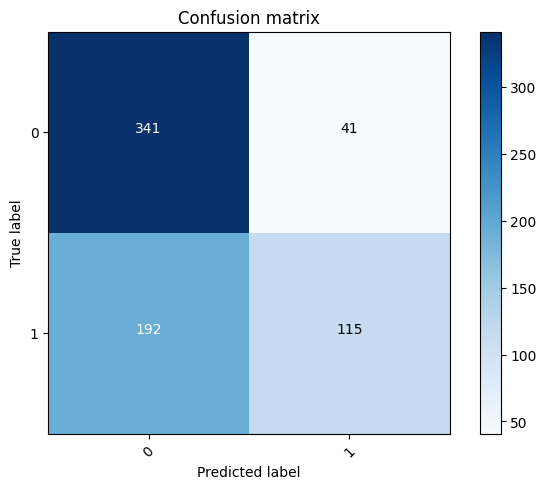

In [40]:
plot_confusion_matrix(cm1, classes)
print(accuracy_score(df.target, pred_1))

0.6502177068214804


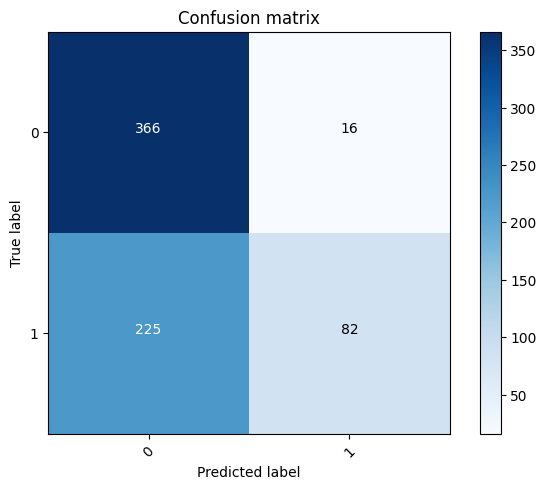

In [41]:
plot_confusion_matrix(cm2, classes)
print(accuracy_score(df.target, pred_2))

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9. (0.5  баллов)** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [42]:
from sklearn.metrics import f1_score

def var3(target, proba):
    best_f1 = 0
    best_i = 0
    for i in np.arange(0, 1.01, 0.01):
        pred = (proba >= i) * 1
        if (accuracy_score(target, pred) >= 0.65) & (f1_score(target, pred) > best_f1):
            best_f1 = f1_score(target, pred)
            best_i = i
    return(best_i)

In [43]:
alg_1 = var3(df.target, df.pred1_probs)
alg_2 = var3(df.target, df.pred2_probs)

print(f'Порог принятия решения для алгоритма 1: {alg_1}')
print(f'Порог принятия решения для алгоритма 2: {alg_2}')

Порог принятия решения для алгоритма 1: 0.36
Порог принятия решения для алгоритма 2: 0.32


In [44]:
pred_1 = (df.pred1_probs >= alg_1) * 1
pred_2 = (df.pred2_probs >= alg_2) * 1

cm1 = confusion_matrix(df.target, pred_1)
cm2 = confusion_matrix(df.target, pred_2)

0.6516690856313497


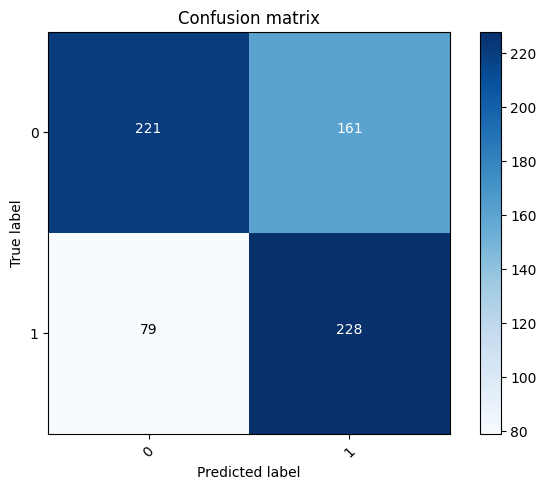

In [45]:
plot_confusion_matrix(cm1, classes)
print(accuracy_score(df.target, pred_1))

0.6850507982583455


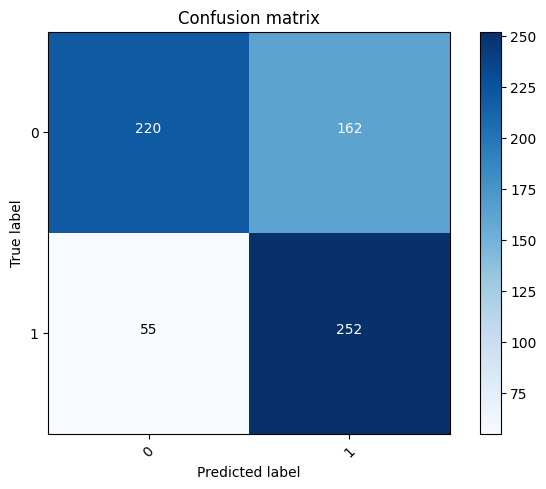

In [46]:
plot_confusion_matrix(cm2, classes)
print(accuracy_score(df.target, pred_2))

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [47]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10. (0.5  баллов)** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [48]:
df_1 = df.drop(['pred1_probs',
                'pred1_classes',
                'pred2_probs',
                'pred2_classes',
                'pred3_probs',
                'pred3_classes'], axis = 1)

y = df_1['target']
X = df_1.drop('target', axis = 1)

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
model = LogisticRegression()
model.fit(X, y)
proba = model.predict_proba(X)[:,-1]

**Задание 11. (0.5  баллов)** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность
    б) полноту
    в) f1-score.
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

0.6719883889695211


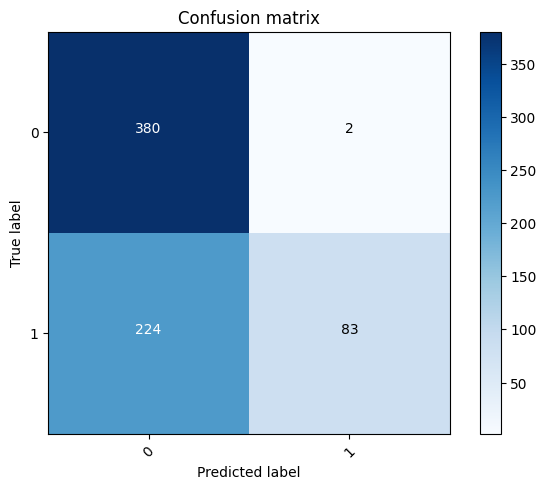

In [51]:
cut = var2(y, proba)
pred = (proba >= cut) * 1

cm = confusion_matrix(y, pred)

plot_confusion_matrix(cm, classes)
print(accuracy_score(y, pred))

0.6734397677793904


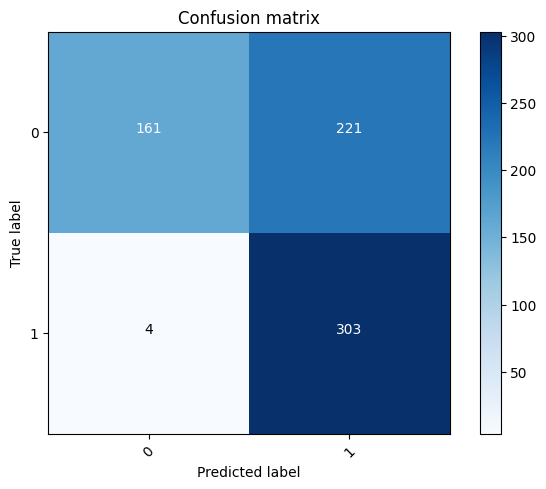

In [52]:
cut = var1(y, proba)
pred = (proba >= cut) * 1

cm = confusion_matrix(y, pred)

plot_confusion_matrix(cm, classes)
print(accuracy_score(y, pred))

0.8809869375907112


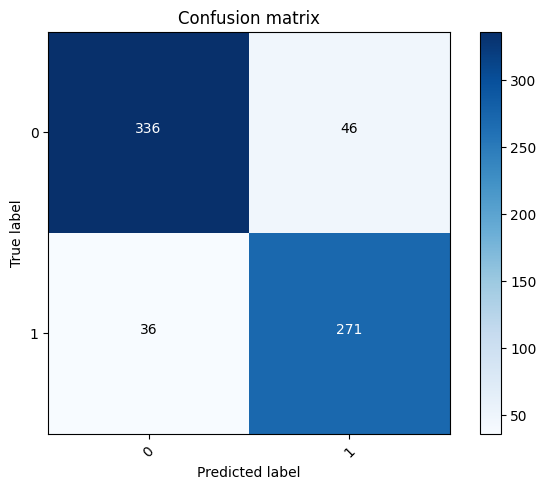

In [53]:
cut = var3(y, proba)

pred = (proba >= cut) * 1

cm = confusion_matrix(y, pred)

plot_confusion_matrix(cm, classes)
print(accuracy_score(y, pred))

Данная логистическая регрессия лучше справляется задачей
